In [55]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df = pd.read_csv('athletes.csv')
df.head()

,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,NaN
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,NaN
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,NaN
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,NaN
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,NaN


In [56]:
df['medals won'] = df['gold'] + df['silver'] + df['bronze']
del df['gold']
del df['silver']
del df['bronze']

df.head()

,id,name,nationality,sex,date_of_birth,height,weight,sport,info,medals won
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,NaN,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,NaN,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,NaN,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,NaN,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,NaN,0


In [57]:
df['height'] = df['height'] * 3.28084
df['weight'] = df['weight'] * 2.20462

In [58]:
df.head()

,id,name,nationality,sex,date_of_birth,height,weight,sport,info,medals won
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,5.643045,141.09568,athletics,NaN,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,5.511811,123.45872,fencing,NaN,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,6.496063,174.16498,athletics,NaN,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,6.003937,176.36960,taekwondo,NaN,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,5.938320,156.52802,cycling,NaN,0


In [59]:
del df['id']
del df['name']
del df['nationality']
del df['info']

In [60]:
df.head()

,sex,date_of_birth,height,weight,sport,medals won
0,male,1969-10-17,5.643045,141.09568,athletics,0
1,female,1986-09-23,5.511811,123.45872,fencing,0
2,male,1992-05-27,6.496063,174.16498,athletics,1
3,male,1991-01-02,6.003937,176.36960,taekwondo,0
4,male,1990-11-26,5.938320,156.52802,cycling,0


In [61]:
df = df.dropna()
df.head(15)

,sex,date_of_birth,height,weight,sport,medals won
0,male,1969-10-17,5.643045,141.09568,athletics,0
1,female,1986-09-23,5.511811,123.45872,fencing,0
2,male,1992-05-27,6.496063,174.16498,athletics,1
3,male,1991-01-02,6.003937,176.36960,taekwondo,0
4,male,1990-11-26,5.938320,156.52802,cycling,0
5,male,1990-01-26,5.905512,147.70954,triathlon,0
6,male,1993-06-04,6.725722,216.05276,volleyball,1
7,male,1991-09-25,6.332021,220.46200,aquatics,0
8,female,1988-12-14,5.905512,136.68644,athletics,0
9,female,1991-07-22,5.413386,119.04948,athletics,0


In [62]:
df = df.dropna()
year = df["date_of_birth"].values
year = [my_str.split("-")[0] for my_str in year]
year
df["date_of_birth"] = list(map(int, year))
df['age'] = 2016 - df["date_of_birth"]
del df['date_of_birth']
df.head()

,sex,height,weight,sport,medals won,age
0,male,5.643045,141.09568,athletics,0,47
1,female,5.511811,123.45872,fencing,0,30
2,male,6.496063,174.16498,athletics,1,24
3,male,6.003937,176.36960,taekwondo,0,25
4,male,5.938320,156.52802,cycling,0,26


In [63]:

df['medal winner'] = np.where(df['medals won']>=1, 1, 0)


In [64]:
del df['medals won']
del df['sport']
df.head()

,sex,height,weight,age,medal winner
0,male,5.643045,141.09568,47,0
1,female,5.511811,123.45872,30,0
2,male,6.496063,174.16498,24,1
3,male,6.003937,176.36960,25,0
4,male,5.938320,156.52802,26,0


In [65]:
df.describe()

,height,weight,age,medal winner
count,10858.000000,10858.000000,10858.000000,10858.000000
mean,5.797055,158.888982,26.798397,0.161448
std,0.371100,35.631859,5.396994,0.367960
min,3.969816,68.343220,14.000000,0.000000
25%,5.544620,132.277200,23.000000,0.000000
50%,5.774278,154.323400,26.000000,0.000000
75%,6.036746,178.574220,30.000000,0.000000
max,7.250656,374.785400,62.000000,1.000000


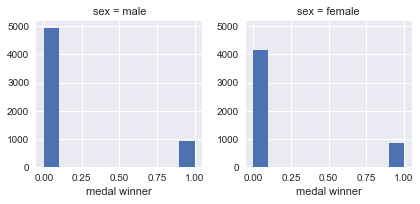

In [66]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

#Plot the small multiples for Prestige vs Admit
multiples = sns.FacetGrid(df, col= 'sex')
multiples = multiples.map(plt.hist, 'medal winner')

ERROR:root:Line magic function `%matploylib` not found.


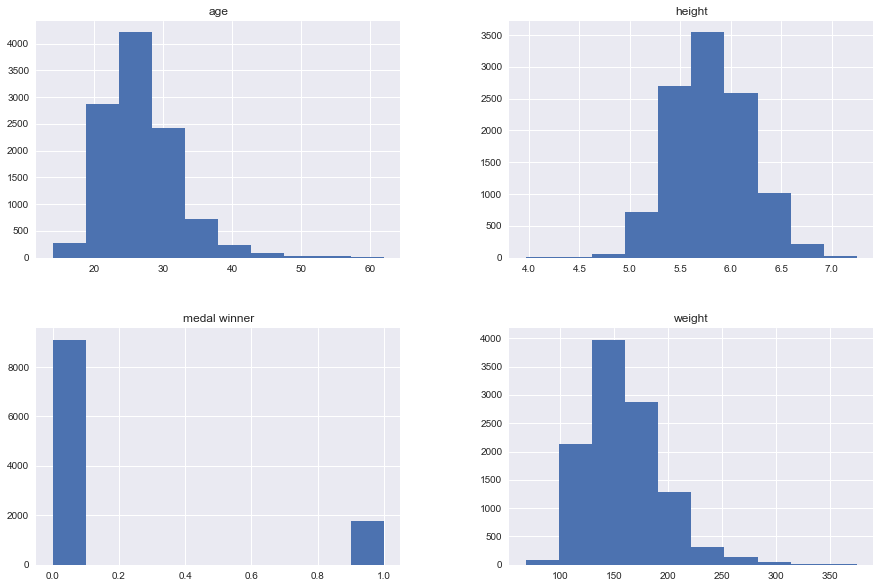

In [67]:
#Variable charts for each in all sports
%matploylib inline
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt

df.hist(figsize = (15,10))
plt.show()

In [68]:
data2 = pd.get_dummies(df, columns =['sex'])
data2['Medal Winner'] = df['medal winner']
del data2['medal winner']
del data2['sex_female']

In [69]:
X = data2.iloc[:,0:4]
y = data2.iloc[:,4]

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [71]:
from sklearn.linear_model import LogisticRegression
LogRegr = LogisticRegression()
LogRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8143, 4)
(2715, 4)
(8143,)
(2715,)


In [73]:
predictions = LogRegr.predict(X_test)

In [74]:
X['intercept'] = 1.0
X.head()

,height,weight,age,sex_male,intercept
0,5.643045,141.09568,47,1,1.0
1,5.511811,123.45872,30,0,1.0
2,6.496063,174.16498,24,1,1.0
3,6.003937,176.36960,25,1,1.0
4,5.938320,156.52802,26,1,1.0


In [75]:
#Logistic Regression Score for predicting medal winners from all sports
score = LogRegr.score(X_test, y_test)
print(score)

0.836832412523


In [76]:
df = pd.read_csv('athletes.csv')
df['medals won'] = df['gold'] + df['silver'] + df['bronze']
del df['gold']
del df['silver']
del df['bronze']
df['height'] = df['height'] * 3.28084
df['weight'] = df['weight'] * 2.20462
del df['id']
del df['name']
del df['nationality']
del df['info']


In [77]:
year = df["date_of_birth"].values
year = [my_str.split("-")[0] for my_str in year]
year
df["date_of_birth"] = list(map(int, year))
df['age'] = 2016 - df["date_of_birth"]
del df['date_of_birth']
df['medal winner'] = np.where(df['medals won']>=1, 1, 0)


del df['medals won']
del df['sport']
df.head()

,sex,height,weight,age,medal winner
0,male,5.643045,141.09568,47,0
1,female,5.511811,123.45872,30,0
2,male,6.496063,174.16498,24,1
3,male,6.003937,176.36960,25,0
4,male,5.938320,156.52802,26,0


In [78]:
df.head(15)

,sex,height,weight,age,medal winner
0,male,5.643045,141.09568,47,0
1,female,5.511811,123.45872,30,0
2,male,6.496063,174.16498,24,1
3,male,6.003937,176.36960,25,0
4,male,5.938320,156.52802,26,0
5,male,5.905512,147.70954,26,0
6,male,6.725722,216.05276,23,1
7,male,6.332021,220.46200,25,0
8,female,5.905512,136.68644,28,0
9,female,5.413386,119.04948,25,0


In [79]:
df =df.dropna()
df.head(15)

,sex,height,weight,age,medal winner
0,male,5.643045,141.09568,47,0
1,female,5.511811,123.45872,30,0
2,male,6.496063,174.16498,24,1
3,male,6.003937,176.36960,25,0
4,male,5.938320,156.52802,26,0
5,male,5.905512,147.70954,26,0
6,male,6.725722,216.05276,23,1
7,male,6.332021,220.46200,25,0
8,female,5.905512,136.68644,28,0
9,female,5.413386,119.04948,25,0


In [80]:
dummy_ranks = pd.get_dummies(df['sex'], prefix='sex')
dummy_ranks.head()

,sex_female,sex_male
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [81]:
cols_to_keep = ['height', 'weight', 'age', 'medal winner']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'sex_male':])
data.head()

,height,weight,age,medal winner,sex_male
0,5.643045,141.09568,47,0,1
1,5.511811,123.45872,30,0,0
2,6.496063,174.16498,24,1,1
3,6.003937,176.36960,25,0,1
4,5.938320,156.52802,26,0,1


In [82]:
data['intercept'] = 1.0
data['Medal Winner'] = data['medal winner']
del data['medal winner']
data.head()

,height,weight,age,sex_male,intercept,Medal Winner
0,5.643045,141.09568,47,1,1.0,0
1,5.511811,123.45872,30,0,1.0,0
2,6.496063,174.16498,24,1,1.0,1
3,6.003937,176.36960,25,1,1.0,0
4,5.938320,156.52802,26,1,1.0,0


In [83]:
xData = data[data.columns[0:5]]
yData = data['Medal Winner']

xData.head(15)

,height,weight,age,sex_male,intercept
0,5.643045,141.09568,47,1,1.0
1,5.511811,123.45872,30,0,1.0
2,6.496063,174.16498,24,1,1.0
3,6.003937,176.36960,25,1,1.0
4,5.938320,156.52802,26,1,1.0
5,5.905512,147.70954,26,1,1.0
6,6.725722,216.05276,23,1,1.0
7,6.332021,220.46200,25,1,1.0
8,5.905512,136.68644,28,0,1.0
9,5.413386,119.04948,25,0,1.0


In [84]:
yData.head()

0    0
1    0
2    1
3    0
4    0
Name: Medal Winner, dtype: int64

In [85]:
logit = sm.Logit(yData, xData)

In [86]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.435686
         Iterations 6


In [87]:
#Logit Regression Results for all athletes
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:           Medal Winner   No. Observations:                10858
Model:                          Logit   Df Residuals:                    10853
Method:                           MLE   Df Model:                            4
Date:                Sun, 06 May 2018   Pseudo R-squ.:                 0.01442
Time:                        09:42:54   Log-Likelihood:                -4730.7
converged:                       True   LL-Null:                       -4799.9
                                        LLR p-value:                 5.990e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.7062      0.110      6.393      0.000       0.490       0.923
weight         0.0035      0.001      3.235      0.001       0.001       0.006
age            0.0043      0.005      0.878      0.3

In [88]:
params = result.params
conf = result.conf_int()
conf['OddsRatio'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
print(np.exp(conf))

               2.5%     97.5%  OddsRatio
height     1.631778  2.516091   2.026253
weight     1.001394  1.005691   1.003540
age        0.994663  1.014137   1.004353
sex_male   0.512890  0.663208   0.583226
intercept  0.000711  0.006278   0.002113


In [89]:
result.predict([[5.75,150, 25, 0, 1]])

array([ 0.18839363])

In [90]:
result.predict([[5.75,150, 25, 1, 1]])

array([ 0.11923838])

In [91]:
result.predict([[5.75,150, 25, 0, 1]])

array([ 0.18839363])

In [92]:
result.predict([[5.9,158, 26, 0, 1]])

array([ 0.21049601])

In [93]:
result.predict([[5.9,158, 26, 1, 1]])

array([ 0.13457272])

In [94]:
df2 = pd.read_csv('athletes.csv')
df2.head()

,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,NaN
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,NaN
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,NaN
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,NaN
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,NaN


In [95]:
df2['medals won'] = df2['gold'] + df2['silver'] + df2['bronze']
del df2['gold']
del df2['silver']
del df2['bronze']
df2['height'] = df2['height'] * 3.28084
df2['weight'] = df2['weight'] * 2.20462

In [96]:
del df2['id']
del df2['name']
del df2['nationality']
del df2['info']
df2.head()

,sex,date_of_birth,height,weight,sport,medals won
0,male,1969-10-17,5.643045,141.09568,athletics,0
1,female,1986-09-23,5.511811,123.45872,fencing,0
2,male,1992-05-27,6.496063,174.16498,athletics,1
3,male,1991-01-02,6.003937,176.36960,taekwondo,0
4,male,1990-11-26,5.938320,156.52802,cycling,0


In [97]:
df2 = df2.dropna()
year = df2["date_of_birth"].values
year = [my_str.split("-")[0] for my_str in year]
year
df2["date_of_birth"] = list(map(int, year))
df2['age'] = 2016 - df2["date_of_birth"]
del df2['date_of_birth']
df2.head()

,sex,height,weight,sport,medals won,age
0,male,5.643045,141.09568,athletics,0,47
1,female,5.511811,123.45872,fencing,0,30
2,male,6.496063,174.16498,athletics,1,24
3,male,6.003937,176.36960,taekwondo,0,25
4,male,5.938320,156.52802,cycling,0,26


In [98]:
df2['medal winner'] = np.where(df2['medals won']>=1, 1, 0)
del df2['medals won']

In [99]:
df2.head()

,sex,height,weight,sport,age,medal winner
0,male,5.643045,141.09568,athletics,47,0
1,female,5.511811,123.45872,fencing,30,0
2,male,6.496063,174.16498,athletics,24,1
3,male,6.003937,176.36960,taekwondo,25,0
4,male,5.938320,156.52802,cycling,26,0


In [100]:
data_aquatics = df2[df2['sport'] == "aquatics"]
data_athletics = df2[df2['sport'] == "athletics"]
data_basketball = df2[df2['sport'] == "basketball"]
data_golf = df2[df2['sport'] == "golf"]
data_gymnastics = df2[df2['sport'] == "gymnastics"]
data_volleyball = df2[df2['sport'] == "volleyball"]
data_weightlifting = df2[df2['sport'] == "weightlifting"]

In [101]:
del data_aquatics['sport']
del data_athletics['sport'] 
del data_basketball['sport']  
del data_golf['sport']
del data_gymnastics['sport']
data_gymnastics.head()

,sex,height,weight,age,medal winner
210,female,4.790026,77.16170,17,0
212,female,5.479003,127.86796,20,0
221,female,5.610236,101.41252,22,0
294,female,5.741470,119.04948,24,1
343,female,5.511811,105.82176,20,0


In [102]:
data_gymnastics.describe()

,height,weight,age,medal winner
count,319.000000,319.000000,319.000000,319.000000
mean,5.374407,119.664562,22.517241,0.219436
std,0.284181,19.196423,4.333450,0.414515
min,4.363517,68.343220,16.000000,0.000000
25%,5.216536,105.821760,19.000000,0.000000
50%,5.413386,119.049480,22.000000,0.000000
75%,5.577428,132.277200,25.000000,0.000000
max,6.036746,178.574220,41.000000,1.000000


ERROR:root:Line magic function `%matploylib` not found.


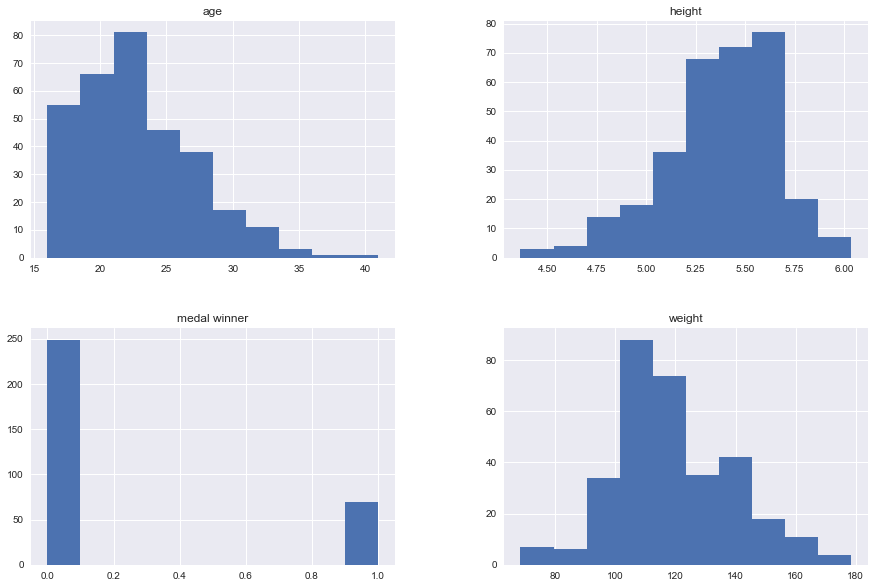

In [103]:
#Data for gymnasts
%matploylib inline
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt

data_gymnastics.hist(figsize = (15,10))
plt.show()

In [104]:
data2 = pd.get_dummies(data_gymnastics, columns =['sex'])
data2['Medal Winner'] = data_gymnastics['medal winner']
del data2['medal winner']
del data2['sex_female']

In [105]:

X = data2.iloc[:,0:4]
y = data2.iloc[:,4]



In [106]:
X.head()

,height,weight,age,sex_male
210,4.790026,77.16170,17,0
212,5.479003,127.86796,20,0
221,5.610236,101.41252,22,0
294,5.741470,119.04948,24,0
343,5.511811,105.82176,20,0


In [107]:
y.head()

210    0
212    0
221    0
294    1
343    0
Name: Medal Winner, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [109]:
from sklearn.linear_model import LogisticRegression
LogRegr = LogisticRegression()
LogRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
#Logistic Regression Score for predicting medal winners in gymnastics
predictions = LogRegr.predict(X_test)
score = LogRegr.score(X_test, y_test)
print(score)

0.75


In [111]:
data2.head()

,height,weight,age,sex_male,Medal Winner
210,4.790026,77.16170,17,0,0
212,5.479003,127.86796,20,0,0
221,5.610236,101.41252,22,0,0
294,5.741470,119.04948,24,0,1
343,5.511811,105.82176,20,0,0


In [112]:
X = data2.iloc[:,0:4]
y = data2.iloc[:,4]
X['intercept'] = 1.0

In [113]:
X.head()

,height,weight,age,sex_male,intercept
210,4.790026,77.16170,17,0,1.0
212,5.479003,127.86796,20,0,1.0
221,5.610236,101.41252,22,0,1.0
294,5.741470,119.04948,24,0,1.0
343,5.511811,105.82176,20,0,1.0


In [114]:
logit = sm.Logit(y, X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.510470
         Iterations 6


In [115]:
#Logit Regression Results for Gymnasts
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:           Medal Winner   No. Observations:                  319
Model:                          Logit   Df Residuals:                      314
Method:                           MLE   Df Model:                            4
Date:                Sun, 06 May 2018   Pseudo R-squ.:                 0.02988
Time:                        09:42:56   Log-Likelihood:                -162.84
converged:                       True   LL-Null:                       -167.86
                                        LLR p-value:                   0.03990
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.4801      0.677      0.709      0.478      -0.847       1.807
weight        -0.0334      0.014     -2.323      0.020      -0.062      -0.005
age           -0.0154      0.036     -0.429      0.6

In [116]:
params = result.params
conf = result.conf_int()
conf['OddsRatio'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
print(np.exp(conf))

               2.5%       97.5%  OddsRatio
height     0.428786    6.091578   1.616163
weight     0.940241    0.994792   0.967132
age        0.917997    1.056339   0.984741
sex_male   1.680006   10.603603   4.220678
intercept  0.003259  277.190247   0.950508


In [117]:
result.predict([[5.6, 110, 22, 0, 1]])

array([ 0.20149865])

In [118]:
result.predict([[5.6, 110, 22, 1, 1]])

array([ 0.5157552])

In [119]:
result.predict([[5.6, 128, 22, 0, 1]])

array([ 0.12147686])

In [120]:
#Data below is for Aquatics
data_aquatics.head()

,sex,height,weight,age,medal winner
7,male,6.332021,220.46200,25,0
14,female,5.839895,149.91416,20,1
26,male,5.938320,158.73264,22,0
45,male,6.233596,198.41580,28,0
64,female,5.446194,134.48182,27,0


In [121]:
data_aquatics.describe()

,height,weight,age,medal winner
count,1396.000000,1396.000000,1396.000000,1396.000000
mean,5.867251,159.343806,23.906160,0.184097
std,0.361777,31.601357,4.341903,0.387703
min,4.691601,85.980180,14.000000,0.000000
25%,5.577428,134.481820,21.000000,0.000000
50%,5.839895,154.323400,23.000000,0.000000
75%,6.135171,180.778840,27.000000,0.000000
max,7.250656,286.600600,41.000000,1.000000


ERROR:root:Line magic function `%matploylib` not found.


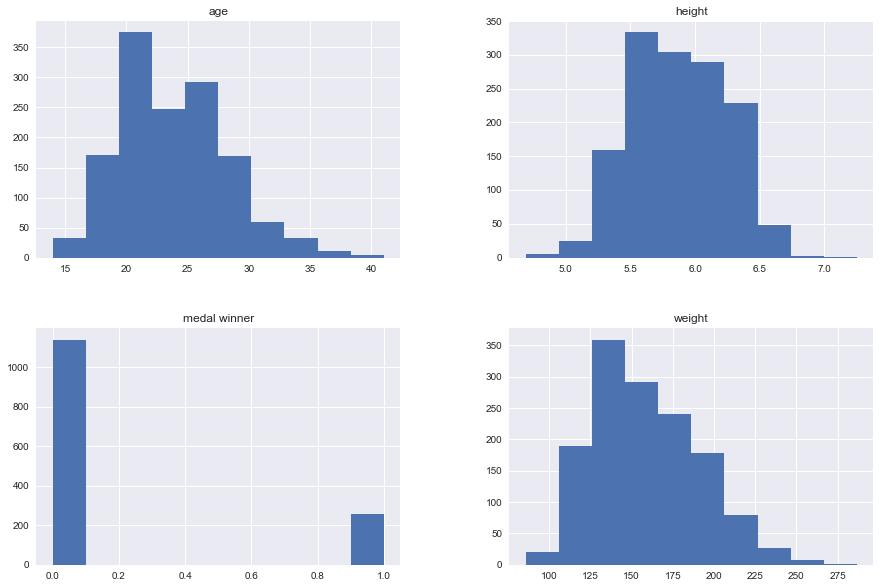

In [122]:
#Data for aquatics
%matploylib inline
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt

data_aquatics.hist(figsize = (15,10))
plt.show()

In [123]:
data2 = pd.get_dummies(data_aquatics, columns =['sex'])
data2['Medal Winner'] = data_aquatics['medal winner']
del data2['medal winner']
del data2['sex_female']
data2.head()

,height,weight,age,sex_male,Medal Winner
7,6.332021,220.46200,25,1,0
14,5.839895,149.91416,20,0,1
26,5.938320,158.73264,22,1,0
45,6.233596,198.41580,28,1,0
64,5.446194,134.48182,27,0,0


In [124]:
X = data2.iloc[:,0:4]
y = data2.iloc[:,4]

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [126]:
from sklearn.linear_model import LogisticRegression
LogRegr = LogisticRegression()
LogRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
#Logistic Regression score for aquatics
predictions = LogRegr.predict(X_test)
score = LogRegr.score(X_test, y_test)
print(score)

0.813753581662


In [128]:
import seaborn as sns

from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[284   1]
 [ 64   0]]


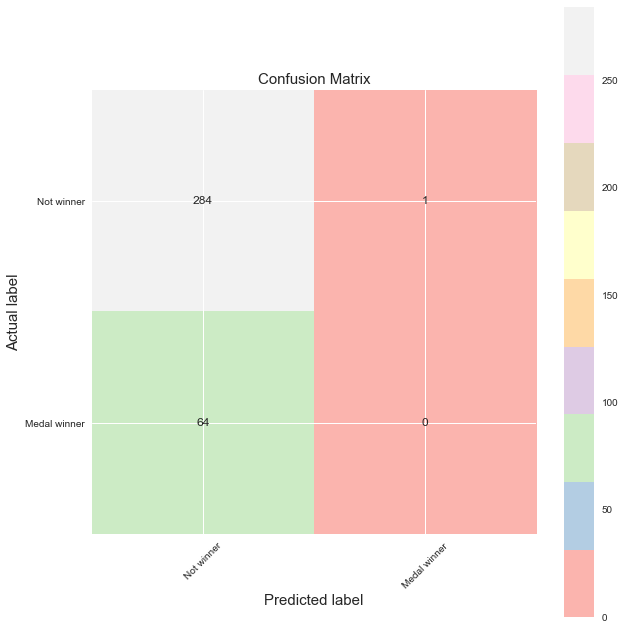

In [129]:
#Confusion Matrix of predicting aquatic medal winners
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion Matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Not winner", "Medal winner"], rotation=45, size = 10)
plt.yticks(tick_marks, ["Not winner", "Medal winner"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')
plt.show()

In [130]:
data2.head()

,height,weight,age,sex_male,Medal Winner
7,6.332021,220.46200,25,1,0
14,5.839895,149.91416,20,0,1
26,5.938320,158.73264,22,1,0
45,6.233596,198.41580,28,1,0
64,5.446194,134.48182,27,0,0


In [131]:
X = data2.iloc[:,0:4]
y = data2.iloc[:,4]
X['intercept'] = 1.0

In [132]:
logit = sm.Logit(y, X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463954
         Iterations 6


In [133]:
#Logit Regression for aquatics
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:           Medal Winner   No. Observations:                 1396
Model:                          Logit   Df Residuals:                     1391
Method:                           MLE   Df Model:                            4
Date:                Sun, 06 May 2018   Pseudo R-squ.:                 0.02847
Time:                        09:42:57   Log-Likelihood:                -647.68
converged:                       True   LL-Null:                       -666.66
                                        LLR p-value:                 1.141e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
height         1.2072      0.388      3.108      0.002       0.446       1.968
weight         0.0016      0.005      0.346      0.729      -0.007       0.010
age            0.0444      0.016      2.695      0.0

In [134]:
params = result.params
conf = result.conf_int()
conf['OddsRatio'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
print(np.exp(conf))

               2.5%     97.5%  OddsRatio
height     1.561960  7.159010   3.343962
weight     0.992707  1.010514   1.001571
age        1.012189  1.079740   1.045419
sex_male   0.257653  0.587161   0.388952
intercept  0.000002  0.003011   0.000077


In [135]:
result.predict([[5.8, 145, 22, 0, 1]])

array([ 0.22033657])

In [136]:
result.predict([[5.8, 145, 22, 1, 1]])

array([ 0.09903392])

In [149]:
result.predict([[5.8, 145, 25, 0, 1]])

array([ 0.24407766])